In [1]:
import pandas as pd

In [6]:
import pandas as pd

# Assuming your data is in a file named 'spamhamdata.csv'
df = pd.read_csv('spamhamdata.csv', sep='\t', names=['target', 'message'])
df


,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
invalidated_data = pd.DataFrame(columns=df.columns)
validated_data = pd.DataFrame(columns=df.columns)


In [11]:
# invalidated_data
invalidated_data

,target,message


In [26]:
import pandas as pd
import yaml

def load_config(file_path):
    """Load configuration from a YAML file."""
    with open(file_path, 'r') as config_file:
        config = yaml.safe_load(config_file)
    return config

def validate_dataframe_with_config(df, config):
    """
    Validate a DataFrame based on configuration settings.

    Parameters:
    - df: DataFrame to be validated
    - config: Dictionary containing columns and data type information

    Returns:
    - True if all validations pass, False otherwise
    """
    # Extract columns and data types from the config
    expected_columns = config.get('columns', [])
    expected_data_types = {column: dtype for column, dtype in config.get('columns_data_type', {}).items()}

    # Column name validation
    is_valid_columns = set(df.columns) == set(expected_columns)
    if not is_valid_columns:
        print("Column name validation failed. Unexpected columns found.")

    # Data type validation
    is_valid_data_types = True
    for column, expected_dtype in expected_data_types.items():
        actual_dtype = df[column].dtype
        if actual_dtype != expected_dtype:
            print(f"Data type validation failed for column '{column}': Expected {expected_dtype}, but got {actual_dtype}")
            is_valid_data_types = False

    return is_valid_columns and is_valid_data_types

# Sample DataFrame
data = {'Text_Message': ['text1', 'text2'], 'Target': ['value1', 'value2']}
df = pd.DataFrame(data)

# Load configuration from YAML file
config_file_path = 'path/to/config.yaml'
config = load_config(config_file_path)

# Check DataFrame against configuration and return result
result = validate_dataframe_with_config(df, config)

if result:
    print("DataFrame validation passed.")
else:
    print("DataFrame validation failed.")


Validation failed for column 'message': Expected int, but got object
Some data types are invalid.


In [19]:
def validation_rules():
    validation_rules={'message': 'object', 'target': 'object'}
    for column, expected_dtype in validation_rules.items():
        if column not in df.columns:
            print(f"Column '{column}' is missing in the input data.")
            return df
        df[df[column].notna()]]

In [21]:
df[df[column].notna()]

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
df['message'].dtype

dtype('O')

In [ ]:
    def _handle_validation_and_invalid_data(self, df: pd.DataFrame, validation_rules: dict) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """Handle generic data validation and handle invalidated data based on rules."""
        logging.info("Validating data and handling invalidated data...")

        invalidated_data = pd.DataFrame(columns=df.columns)
        validated_data = pd.DataFrame(columns=df.columns)

        for column, expected_dtype in validation_rules.items():
            if column not in df.columns:
                raise ham_spam(f"Column '{column}' is missing in the input data.")
            
            # Check the actual data type of the column
            actual_dtype = df[column].dtype
            
            # Validate the data type
            if actual_dtype != expected_dtype:
                logging.info(f"Invalidating data for column '{column}' with unexpected data type '{actual_dtype}'.")
                invalidated_data = pd.concat([invalidated_data, df[df[column].notna()]])
                df = df[df[column].isna()]
            else:
                validated_data = pd.concat([validated_data, df[df[column].notna()]])
                df = df[df[column].isna()]

In [7]:
df.duplicated().sum()

403

In [8]:
df.target.value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

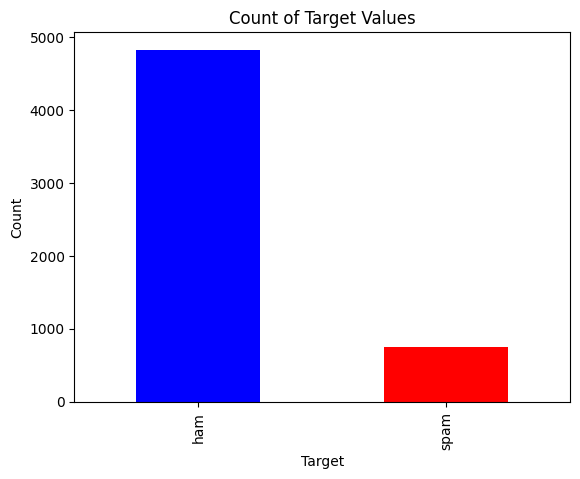

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

target_counts = df['target'].value_counts()

target_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Count of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
